<a href="https://colab.research.google.com/github/inesismo/TFM/blob/main/SplitGaitCycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar archivo

In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks, peak_prominences


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Obtener la ruta del archivo
#file_path = "/content/drive/MyDrive/CSVFILES/andando_MetaWear_2020-07-21T13.26.57.052_DE982C9EB595_Accelerometer_100.000Hz_1.5.0.csv"
file_path = "/content/drive/MyDrive/CSVFILES/inesBare_Up19_2023-04-05T16.50.24.089_F65B0F670C19_Accelerometer_100.000Hz_1.7.2.csv"
# Importar el archivo
data = pd.read_csv(file_path)

data.head()

,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1680706224218,2023-04-05T16:50:24.218,0.00,-0.976,0.029,0.193
1,1680706224228,2023-04-05T16:50:24.228,0.01,-0.984,0.025,0.196
2,1680706224238,2023-04-05T16:50:24.238,0.02,-0.981,0.029,0.199
3,1680706224248,2023-04-05T16:50:24.248,0.03,-0.976,0.039,0.198
4,1680706224258,2023-04-05T16:50:24.258,0.04,-0.973,0.046,0.195


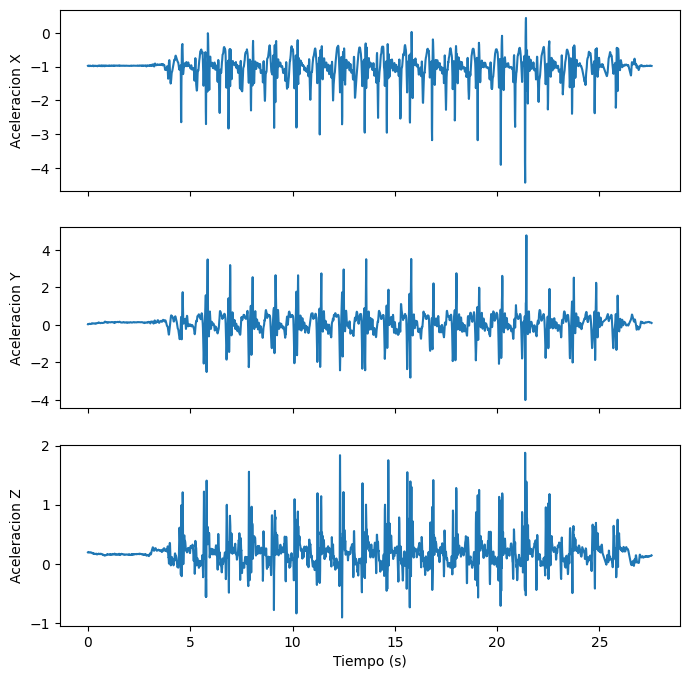

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

ax1.plot(data['elapsed (s)'], data['x-axis (g)'])
ax1.set_ylabel('Aceleracion X')

ax2.plot(data['elapsed (s)'], data['y-axis (g)'])
ax2.set_ylabel('Aceleracion Y')

ax3.plot(data['elapsed (s)'], data['z-axis (g)'])
ax3.set_ylabel('Aceleracion Z')
ax3.set_xlabel('Tiempo (s)')

plt.show()


# Filtro savgol

In [ ]:
# Definir los parámetros del filtro
window_size = 51
order = 3

# Aplicar el filtro a cada columna del DataFrame
data['aceleracion_x_filtered'] = savgol_filter(data['x-axis (g)'], window_size, order)
data['aceleracion_y_filtered'] = savgol_filter(data['y-axis (g)'], window_size, order)
data['aceleracion_z_filtered'] = savgol_filter(data['z-axis (g)'], window_size, order)


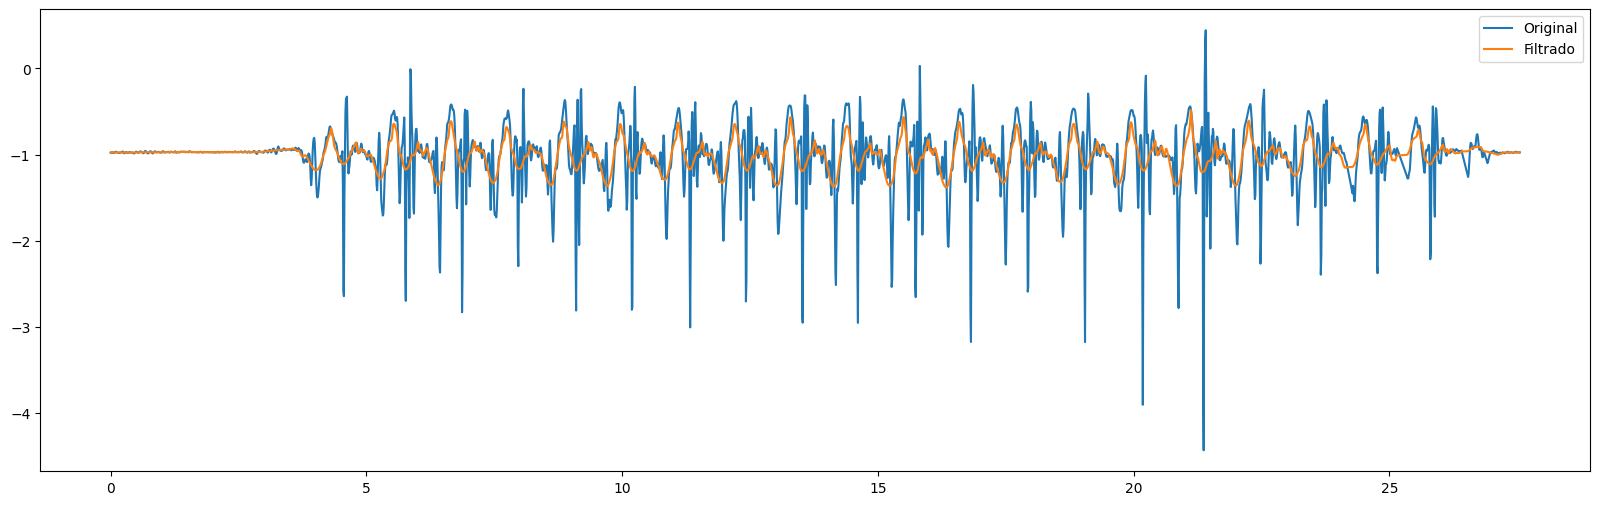

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data['elapsed (s)'], data['x-axis (g)'], label='Original')
plt.plot(data['elapsed (s)'], data['aceleracion_x_filtered'], label='Filtrado')
plt.legend()
plt.show()


# FIND PEAKS 

## Picos y valles eje vertical
Se encuentran los máximos y mínimos dada una altura determinada. Esto depende de qué eje se elija al medir. Este análisis es con el eje vertical de la gravedad.

In [ ]:
x=data['aceleracion_x_filtered']
np.max(x)

-0.609875172710582

Se puede calcular el valor máximo de todos los datos de la aceleración, y luego limitar los peaks si pasan el 60%

In [ ]:
lim_max = 0.6*(np.max(x)-np.mean(x))+np.mean(x)

Puede que haya problema con que se use el máximo valor del dataset por si hubiera un valor muy lejano. se puede pensar otra alternativa.

In [ ]:
lim_min = np.abs(0.5*(np.min(x)-np.mean(x))+np.mean(x))
lim_min

1.2777907774077808

In [ ]:
peaks, _ = find_peaks(x, height=lim_max)
valleys, _ = find_peaks(-x, height=lim_min)

In [ ]:
num_pasos=len(peaks)
tiempo=np.max(data['elapsed (s)'])
print("Se han realizado un total de",num_pasos*2," pasos en un tiempo de ",tiempo,"segundos.")

Se han realizado un total de 60  pasos en un tiempo de  34.37 segundos.


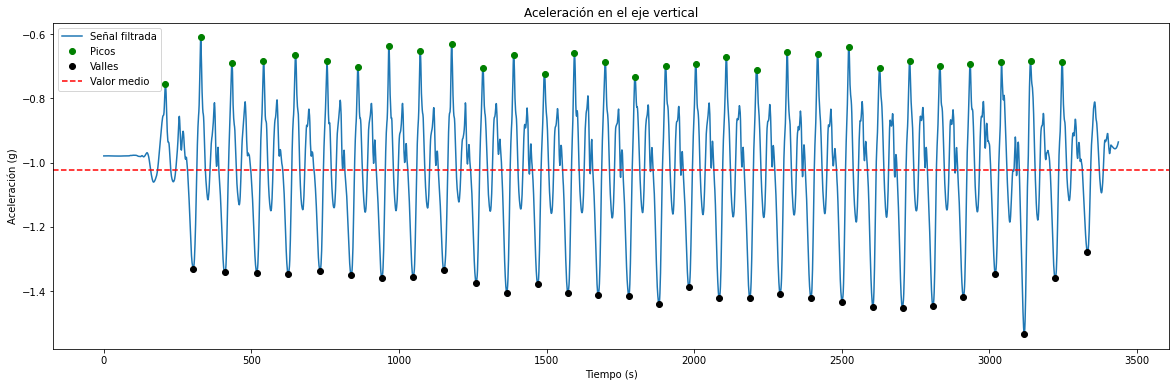

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(x, label='Señal filtrada')
plt.plot(peaks, x[peaks], "o",color='g', label='Picos')
plt.plot(valleys, x[valleys], "o",color='black', label='Valles')
plt.axhline(y=np.mean(x), color='r', linestyle='--', label='Valor medio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (g)')
plt.title('Aceleración en el eje vertical')
plt.legend()
plt.show()

Punto negro creo que es el talón.

## Picos eje y



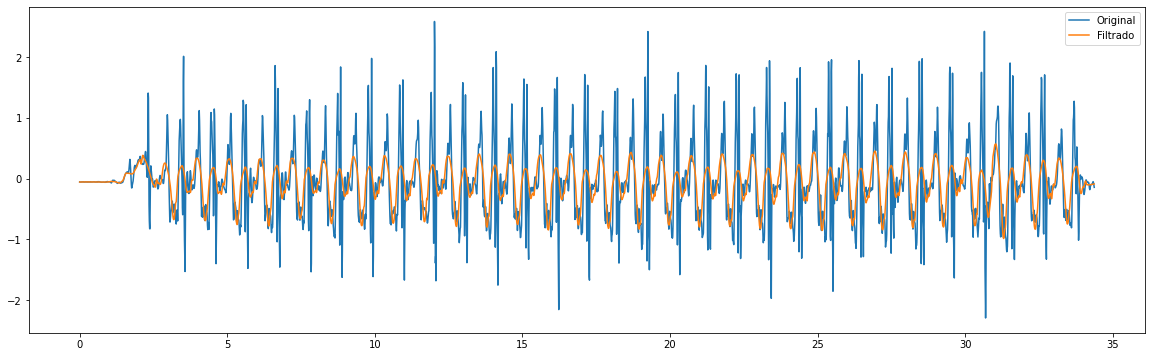

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data['elapsed (s)'], data['y-axis (g)'], label='Original')
plt.plot(data['elapsed (s)'], data['aceleracion_y_filtered'], label='Filtrado')
plt.legend()
plt.show()

In [ ]:
x=data['aceleracion_y_filtered']
lim_max = 0.6*(np.max(x)-np.mean(x))+np.mean(x)
lim_min = np.abs(0.5*(np.min(x)-np.mean(x))+np.mean(x))
peaks, _ = find_peaks(x, height=lim_max)
valleys, _ = find_peaks(-x, height=lim_min)

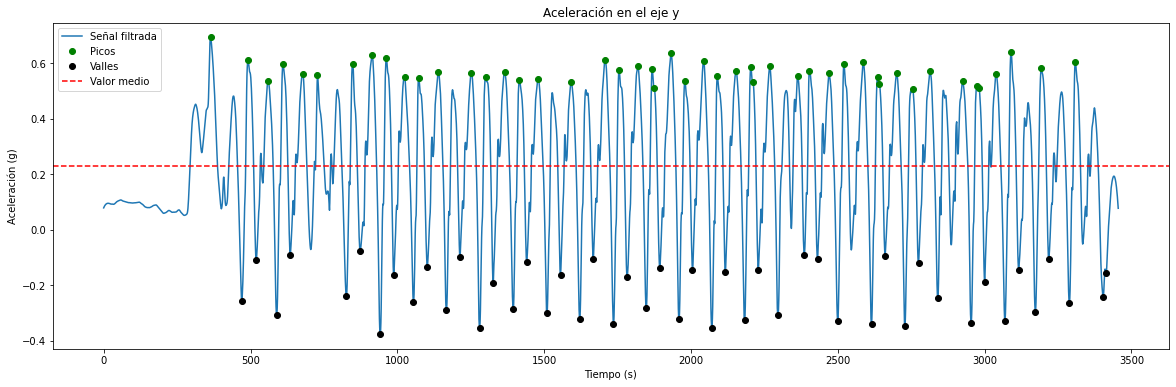

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(x, label='Señal filtrada')
plt.plot(peaks, x[peaks], "o",color='g', label='Picos')
plt.plot(valleys, x[valleys], "o",color='black', label='Valles')
plt.axhline(y=np.mean(x), color='r', linestyle='--', label='Valor medio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (g)')
plt.title('Aceleración en el eje y')
plt.legend()
plt.show()

## Picos eje z

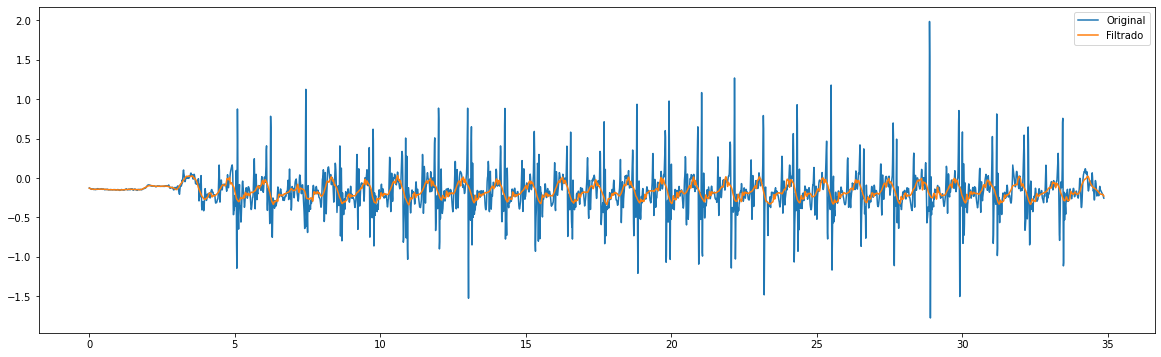

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data['elapsed (s)'], data['z-axis (g)'], label='Original')
plt.plot(data['elapsed (s)'], data['aceleracion_z_filtered'], label='Filtrado')
plt.legend()
plt.show()

In [ ]:
x=data['aceleracion_z_filtered']
lim_max = 0.6*(np.max(x)-np.mean(x))+np.mean(x)
lim_min = np.abs(0.5*(np.min(x)-np.mean(x))+np.mean(x))
peaks, _ = find_peaks(x, height=lim_max)
valleys, _ = find_peaks(-x, height=lim_min)

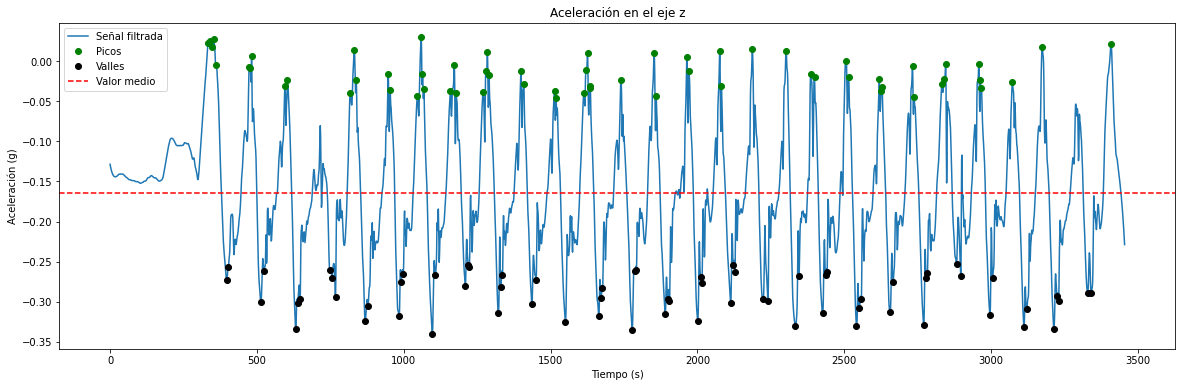

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(x, label='Señal filtrada')
plt.plot(peaks, x[peaks], "o",color='g', label='Picos')
plt.plot(valleys, x[valleys], "o",color='black', label='Valles')
plt.axhline(y=np.mean(x), color='r', linestyle='--', label='Valor medio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (g)')
plt.title('Aceleración en el eje z')
plt.legend()
plt.show()

# Fases stance y swing

In [ ]:
# Identificar los picos máximo y mínimo de la señal de acelerómetro
x=data['aceleracion_x_filtered']
lim_max = 0.6*(np.max(x)-np.mean(x))+np.mean(x)
lim_min = np.abs(0.5*(np.min(x)-np.mean(x))+np.mean(x))
peaks, _ = find_peaks(x, height=lim_max)
valleys, _ = find_peaks(-x, height=lim_min)


Se puede usar una función para encontrar las prominencias de los picos de la función.

In [ ]:
prominences = peak_prominences(x, peaks)[0]

O también se puede directamente encontrar los picos con cierto rango de prominencia.

In [ ]:
peaks_prom, _ = find_peaks(x, prominence=(0.5, 2))

De hecho, he obtenido el mismo resultado que haciendo todo lo de lim max y min de arriba. Hay que ver cuál funciona mejor para todos los casos.

In [ ]:
print(peaks_prom)
print(peaks)

[ 482  601  721  838  952 1065 1179 1290 1405 1518 1633 1746 1860 1970
 2081 2196 2311 2513 2625 2738 2852 2964 3080 3185 3299]
[ 482  601  721  838  952 1065 1179 1290 1405 1518 1633 1746 1860 1970
 2081 2196 2311 2513 2625 2738 2852 2964 3080 3185 3299]


## Picos de la fase swing

In [ ]:
#Se calcula primero TODOS los picos de la señal
peaks2,_=find_peaks(x)

Ahora hay que quitar los de los laterales, se dejan solo los que estén dentro del rango de cuando estamos andando.

In [ ]:
peaks2_filt = peaks2[(peaks2 > peaks[0]) & (peaks2 < peaks[-1])]

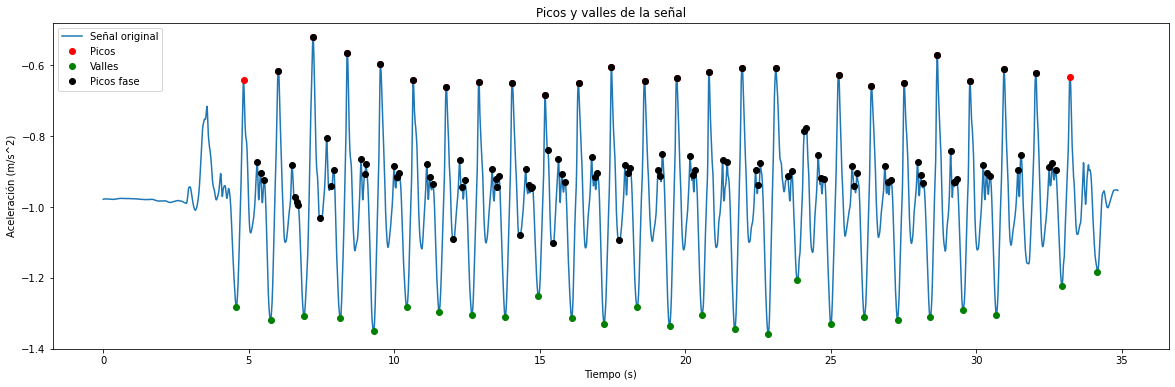

In [ ]:
# Graficar la señal y resaltar los picos y valles
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data['elapsed (s)'], data['aceleracion_x_filtered'], label='Señal original')
ax.plot(data['elapsed (s)'][peaks], data['aceleracion_x_filtered'][peaks], 'o', label='Picos', color= 'r')
ax.plot(data['elapsed (s)'][valleys], data['aceleracion_x_filtered'][valleys], 'o', label='Valles', color='g')
ax.plot(data['elapsed (s)'][peaks2_filt], data['aceleracion_x_filtered'][peaks2_filt], 'o', label='Picos fase', color='black')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Aceleración (m/s^2)')
ax.set_title('Picos y valles de la señal')
ax.legend()
plt.show()

Ahora habría que quitar los picos de arriba y algunos de abajo, o sea dejar los cercanos a la línea media.

In [ ]:
peaks2_filt

array([ 529,  541,  553,  601,  648,  657,  664,  668,  721,  746,  768,
        782,  792,  838,  886,  898,  902,  952,  999, 1008, 1010, 1016,
       1065, 1111, 1122, 1133, 1179, 1203, 1224, 1233, 1242, 1290, 1336,
       1348, 1352, 1359, 1405, 1431, 1451, 1462, 1468, 1474, 1518, 1527,
       1544, 1564, 1576, 1586, 1633, 1678, 1688, 1697, 1746, 1772, 1793,
       1804, 1809, 1860, 1906, 1914, 1921, 1970, 2016, 2025, 2033, 2081,
       2128, 2144, 2196, 2241, 2250, 2258, 2311, 2343, 2355, 2397, 2401,
       2442, 2451, 2464, 2513, 2559, 2567, 2576, 2625, 2671, 2682, 2691,
       2738, 2784, 2795, 2803, 2852, 2898, 2908, 2913, 2918, 2964, 3010,
       3021, 3033, 3080, 3128, 3139, 3185, 3230, 3241, 3252])

Dejo los que están por encima de la línea media y por debajo del menor de los picos altos.

In [ ]:
peaks2_filt2 = peaks2_filt[(x[peaks2_filt] > np.mean(x)) & (x[peaks2_filt]<x[peaks].min())]
peaks2_filt2

array([ 529,  541,  553,  648,  657,  664,  768,  782,  792,  886,  898,
        902,  999, 1008, 1010, 1016, 1111, 1122, 1133, 1224, 1233, 1242,
       1336, 1348, 1352, 1359, 1451, 1462, 1468, 1474, 1527, 1564, 1576,
       1586, 1678, 1688, 1697, 1793, 1804, 1809, 1906, 1914, 1921, 2016,
       2025, 2033, 2128, 2144, 2241, 2250, 2258, 2343, 2355, 2397, 2401,
       2442, 2451, 2464, 2559, 2567, 2576, 2671, 2682, 2691, 2784, 2795,
       2803, 2898, 2908, 2913, 2918, 3010, 3021, 3033, 3128, 3139, 3230,
       3241, 3252])

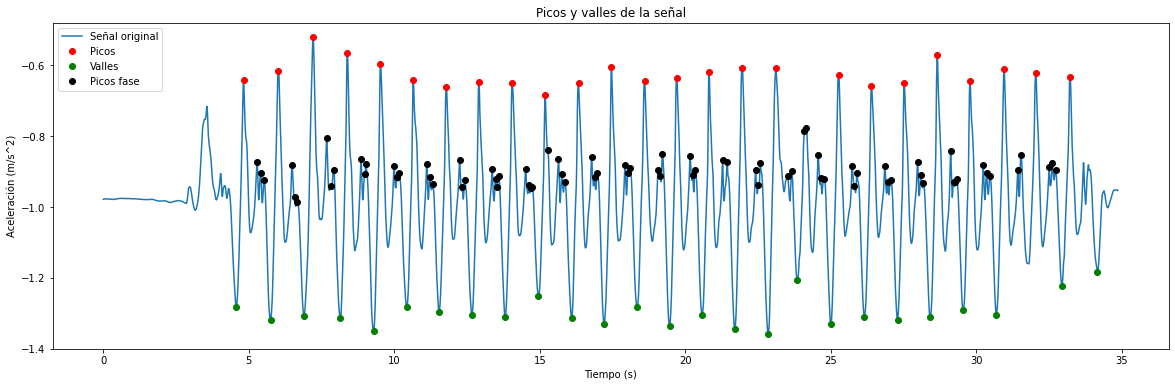

In [ ]:
# Graficar la señal y resaltar los picos y valles
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data['elapsed (s)'], data['aceleracion_x_filtered'], label='Señal original')
ax.plot(data['elapsed (s)'][peaks], data['aceleracion_x_filtered'][peaks], 'o', label='Picos', color= 'r')
ax.plot(data['elapsed (s)'][valleys], data['aceleracion_x_filtered'][valleys], 'o', label='Valles', color='g')
ax.plot(data['elapsed (s)'][peaks2_filt2], data['aceleracion_x_filtered'][peaks2_filt2], 'o', label='Picos fase', color='black')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Aceleración (m/s^2)')
ax.set_title('Picos y valles de la señal')
ax.legend()
plt.show()

In [ ]:
# Segmentar los datos en las fases de la marcha
stance_phase = []
swing_phase = []
# Si el primer pico que aparece es positivo o negativo
if(peaks[0]>valleys[0]):
  for i in range(len(peaks)-1):
      start = valleys[i]
      end = peaks[i]
      stance_phase.append(x[start:end])
      start = peaks[i]
      end = valleys[i]
      swing_phase.append(x[start:end])
else:
    for i in range(len(peaks)-1):
      start = peaks[i]
      end = valleys[i]
      stance_phase.append(x[start:end])
      start = valleys[i]
      end = peaks[i]
      swing_phase.append(x[start:end])


In [ ]:
# Analizar los datos segmentados
for phase in stance_phase:
    # Analizar la fase de apoyo
    ...
for phase in swing_phase:
    # Analizar la fase de balanceo
    ...

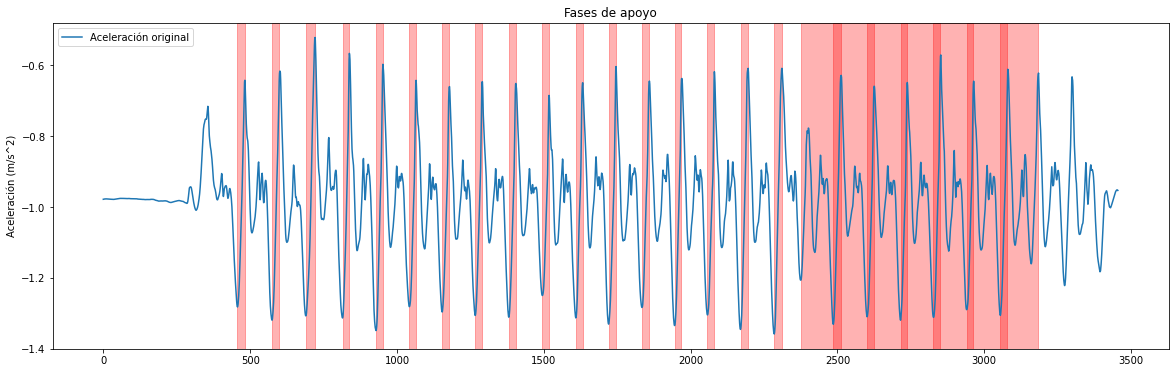

In [ ]:
fig, axs = plt.subplots(figsize=(20, 6))
axs.plot( x, label='Aceleración original')
for phase in stance_phase:
    axs.axvspan(phase.index[0], phase.index[-1], alpha=0.3, color='red')
axs.set_title('Fases de apoyo')
axs.set_ylabel('Aceleración (m/s^2)')
axs.legend()

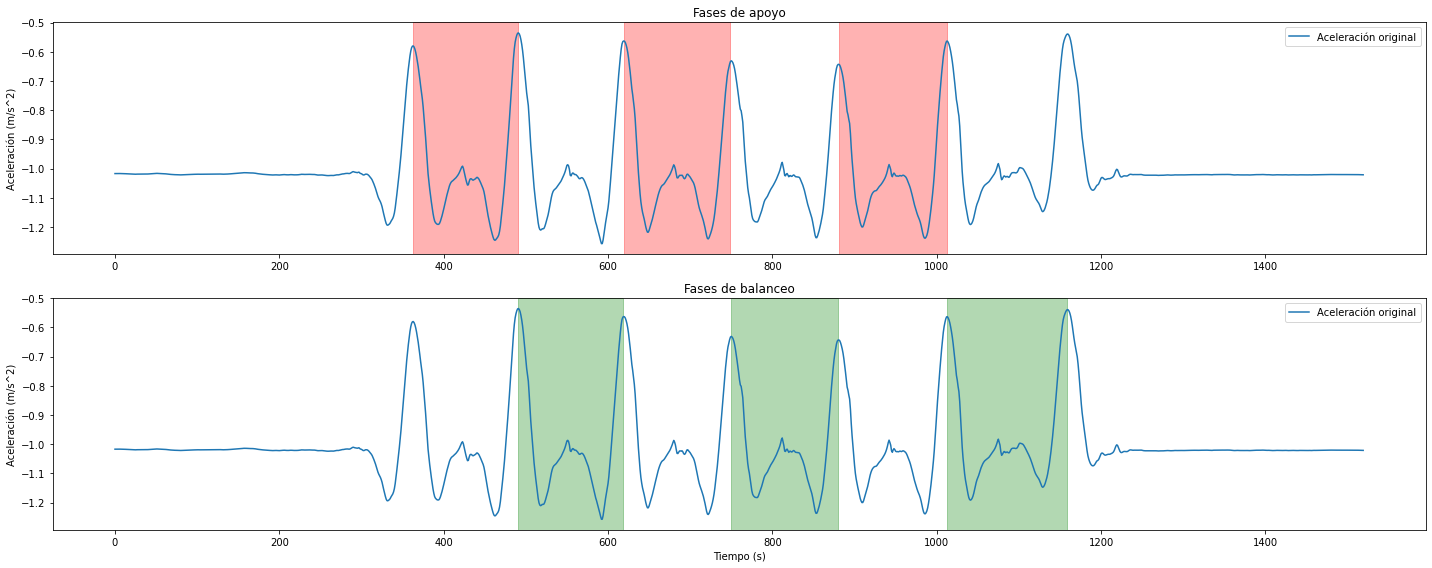

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
axs[0].plot(data['aceleracion_x_filtered'], label='Aceleración original')
for phase in stance_phase:
    axs[0].axvspan(phase.index[0], phase.index[-1], alpha=0.3, color='red')
axs[0].set_title('Fases de apoyo')
axs[0].set_ylabel('Aceleración (m/s^2)')
axs[0].legend()

axs[1].plot( data['aceleracion_x_filtered'], label='Aceleración original')
for phase in swing_phase:
    axs[1].axvspan(phase.index[0], phase.index[-1], alpha=0.3, color='green')
axs[1].set_title('Fases de balanceo')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Aceleración (m/s^2)')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
time=data['elapsed (s)']
filtered_data=x
# Crear un gráfico de la señal filtrada
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, x, label='Filtrada')

# Colorear la fase de apoyo
for i in range(len(stance_phase)):
    ax.fill_between(time[peaks[i]:valleys[i]], filtered_data[peaks[i]:valleys[i]], color='blue', alpha=0.3)

# Colorear la fase de balanceo
for i in range(len(swing_phase)):
    ax.fill_between(time[valleys[i]:peaks[i+1]], filtered_data[valleys[i]:peaks[i+1]], color='red', alpha=0.3)

# Dibujar la línea del valor medio
mean_value = np.mean(filtered_data)
ax.axhline(mean_value, color='green', label='Valor medio')

# Configurar el gráfico
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Aceleración (m/s^2)')
ax.set_title('Fases de la marcha')
ax.legend()

plt.show()


NameError: ignored